## Questionário 71 (Q71)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

Para responder às questões, leia o texto introdutório a seguir.


>Oftalmologistas baseiam-se em imagens para emitir diagnósticos sobre a condição visual de seus pacientes. Uma das técnicas comumemente empregadas é a medição da curvatura da córnea. Grosso modo, a análise verifica tonalidades de cor sobre um gráfico em coordenadas polares como o apresentado na figura abaixo, à esquerda. Entretanto, a imagem completa perfaz um retângulo que contém não só o círculo colorido, mas também a área complementar externa na cor branca, como se vê também à direita. 

 <center><img src="https://i.imgur.com/Zeaz3u9.png" width="800" height="700"></center> 

Imagens representativas de uma córnea com altas curvaturas, indicando uma ectasia. 


>Essas cores que vemos acima são, na verdade, uma composição de tonalidades de vermelho, verde e azul, de modo que a imagem, matematicamente, é representada por um _array_ tridimensional de dimensões $I \times J \times 3$. Isto é, são $I$ pixels no eixo vertical (`axis=0`), são $J$ pixels no eixo horizontal (`axis=1`) e 3 canais de cor contendo, cada, valores que variam de 0 a 255. 
>
>Ou seja, em linguagem computacional, se chamarmos esse array de `img`, o valor de `img[43,99,1]` é a tonalidade da cor "verde" do pixel localizado na posição `i=43` e `j=99`, onde `i` varia de `0` a `I` ao longo do eixo vertical, e `j` varia de `0` a `J` ao longo do eixo horizontal. A terceira componente da tupla de indexação determina o canal de cor: `0`, para vermelho; `1`, para verde e `2` para azul.
>
> O código a seguir foi utilizado para carregar o _array_ 3D da imagem anterior, bem como um _dataframe_  contendo as posições dos pixels das imagens e os valores correspondentes das tonalidades de cor.
>```python
># carrega array da imagem
>img = np.load('SyntEyeKTC-106_a.npz')['arr_0']
>
># carrega dataframe de dados
>col = pd.read_csv('SyntEyeKTC-106_a.csv')
>```
>*Obs.:* acesse os arquivos [aqui](https://github.com/gcpeixoto/ICD/tree/main/database/eyes).

**Questão 1.** Considere a _linha central_ aquela que corta a imagem polar da córnea no ângulo de 0 grau (cor azul). Esta linha é formada por todos os pixels que estão enfileirados ao longo do eixo horizontal (direção _j_) com a posição no eixo vertical  fixa (direção _i_). Supondo que `imed` seja, por divisão inteira, o índice que define o "meio" do eixo vertical, isto é, a coordenada na direção _i_ onde é traçada a _linha central_, assinale a alternativa correta: 

A. `imed = 1100`

***B. `imed = 1250`***

C. `imed = 1550`

D. `imed = 2000`

<div class="alert alert-block alert-success">
<b>Resposta:</b> B. imed = 1250
</div>

In [6]:
import pandas as pd
df = pd.read_csv("SyntEyeKTC-106_a.csv")


Index(['x', 'y', 'r', 'g', 'b'], dtype='object')

In [14]:
len(df[df.x == 2449])//2

1250

In [15]:
df.head(15)

,x,y,r,g,b
0,0,0,255,255,255
1,0,1,255,255,255
2,0,2,255,255,255
3,0,3,255,255,255
4,0,4,255,255,255
5,0,5,255,255,255
6,0,6,255,255,255
7,0,7,255,255,255
8,0,8,255,255,255
9,0,9,255,255,255


## **Questão 2.** Através do código (incompleto) abaixo, somos capazes de plotar os tons de cor em valores de 0 a 255 para cada pixel sobre a _linha central_.

```python
from seaborn import lineplot
col_0 = col[col['x'] == imed]
lineplot(x= ,y= ,data= )
```
Passando os valores corretos para os argumentos `x`, `y` e `data`, as figuras abaixo podem ser reproduzidas. 

 <center><img src="https://i.imgur.com/4qKQ8P4.png" width="800" height="700"></center> 


Sabendo disso, marque a alternativa cuja correspondência entre figura e tons de cor aparecem na ordem correta:

***A. \(a\): vermelho, \(b\): azul, \(c\): verde.***

B. \(a\): azul, \(b\): vermelho, \(c\): verde.

C. \(a\): verde, \(b\): vermelho, \(c\): azul.

D. \(a\): azul, \(b\): verde, \(c\): vermelho.

<div class="alert alert-block alert-success">
<b>Resposta: </b>A. (a): vermelho, (b): azul, (c): verde.
</div>

Text(0.5, 1.0, 'Verde')

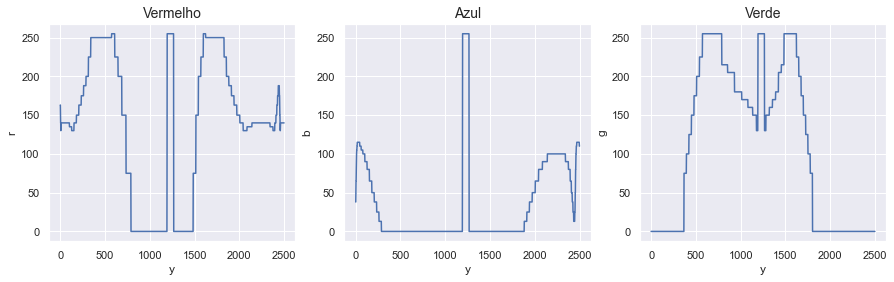

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,4)})
df2 = df.query("x==1250")

fig, ax =plt.subplots(1,3)

sns.lineplot(data=df2['r'],x=df2['y'],y=df2['r'],ax=ax[0]).set_title("Vermelho",fontsize=14)
sns.lineplot(data=df2['b'],x=df2['y'],y=df2['b'],ax=ax[1]).set_title("Azul",fontsize=14)
sns.lineplot(data=df2['g'],x=df2['y'],y=df2['g'],ax=ax[2]).set_title("Verde",fontsize=14)



**Questão 3.** Defina como `colf` o _dataframe_ obtido a partir de `col` pela aplicação de um filtro sobre as tonalidades de cor dado pela seguinte expressão:

>Se $r$, $g$ e $b$ são as tonalidades de vermelho, verde e azul, respectivamente, então, em `colf` deverão constar apenas valores tais que: 
>$50 \le r \le 200, \ \ 50 \le g \le 200, \ \ 50 \le b \le 200$.

A partir disso, use a função `jointplot` do _seaborn_ para descobrir quais são as distribuições marginais do tipo Cor 1 x Cor 2 de tonalidades de cor plotadas abaixo.

 <center><img src="https://i.imgur.com/7AZMcEL.png" width="800" height="700"></center> 


Assinale a alternativa correta: 

A. \(a\): verde x azul, \(b\): vermelho x verde, \(c\): azul x vermelho.

B. \(a\): verde x azul, \(b\): vermelho x azul, \(c\): verde x vermelho.

C. \(a\): vermelho x azul, \(b\): vermelho x verde, \(c\): azul x verde.

***D. \(a\): vermelho x verde, \(b\): vermelho x azul, \(c\): azul x verde.***


<div class="alert alert-block alert-success">
<b>Resposta:</b>D. (a): vermelho x verde, (b): vermelho x azul, (c): azul x verde.
</div>

In [153]:
colf = df.query("50<=r<=200").query("50<=g<=200").query("50<=b<=200")

Text(0.5, 1.08, 'Vermelho x Verde')

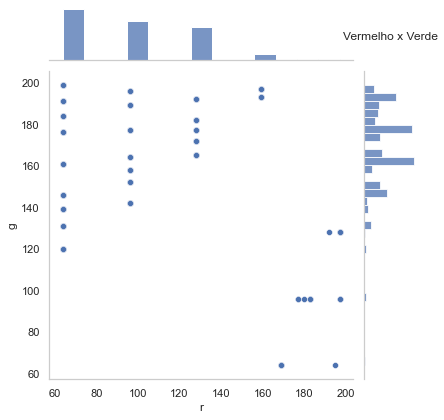

In [169]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.jointplot(data=colf, x="r", y="g")


Text(0.5, 1.08, 'Vermelho x Azul')

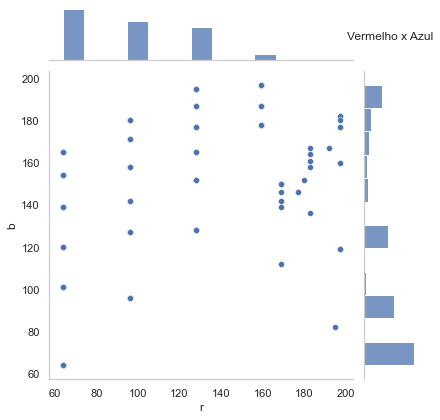

In [168]:
sns.jointplot(data=colf, x="r", y="b")
plt.title("Vermelho x Azul", y=1.08)

Text(0.5, 1.08, 'Azul x Verde')

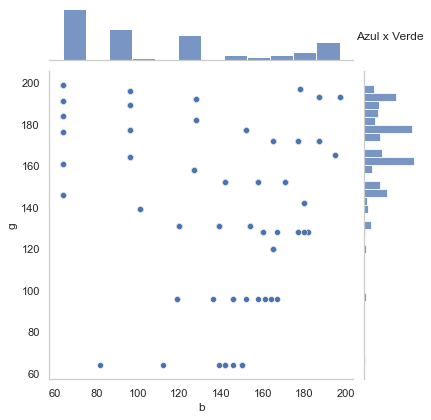

In [166]:
sns.jointplot(data=colf, x="b", y="g")
plt.title("Azul x Verde", y=1.08)